In [25]:
%matplotlib inline

In [75]:
#dependcies
from citipy import citipy
import pandas as pd
import random
import kdtree
import openweathermapy.core as owm
import requests
import seaborn as sb
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10]

#config
from config import api_key

In [65]:
#set empty arrays
city= []
country = []
lati = []
longi = []
#for each integer (latitude) pick 20 random integers (longitude)
#use citipy to find the nearest city to the generated lat/long
for i in range (-90, 90):
    for j in range (20):
        long = random.randint(-180, 181)
        town = citipy.nearest_city(i,long)
        city.append(town.city_name)
        country.append(town.country_code)

In [66]:
#create dataframe with city and country code
df = pd.DataFrame(index=[], columns=['City','Country'])
df['City'] = city
df['Country'] = country
df.head()

,City,Country
0,mataura,pf
1,bluff,nz
2,port alfred,za
3,mataura,pf
4,punta arenas,cl


In [67]:
#drop any duplicate cities
df2 = df.drop_duplicates()
df2.head()

,City,Country
0,mataura,pf
1,bluff,nz
2,port alfred,za
4,punta arenas,cl
5,ushuaia,ar


In [68]:
#set base url and create empty arrays
url = 'http://api.openweathermap.org/data/2.5/weather?q='
Temperature = []
Humidity = []
Cloudiness = []
Wind = []
lati = []
longi = []
#for each row in dataframe grab city and country and set query url
for index, row in df2.iterrows():
    city = row['City']
    country = row['Country']
    query_url = f'{url}{city},{country}&units=imperial&appid={api_key}'
#make api request and add values to arrays   
    try:
        weather_response = requests.get(query_url)
        weather_jsons = weather_response.json()
        Temperature.append(weather_jsons['main']['temp'])
        Humidity.append(weather_jsons['main']['humidity'])
        Cloudiness.append(weather_jsons['clouds']['all'])
        Wind.append(weather_jsons['wind']['speed'])
        lati.append(weather_jsons['coord']['lat'])
        longi.append(weather_jsons['coord']['lon'])
#if an exception is thrown add NaN value to array
    except:
        Temperature.append('NaN')
        Humidity.append('NaN')
        Cloudiness.append('NaN')
        Wind.append('NaN')
        lati.append('NaN')
        longi.append('NaN')

In [69]:
#add columns to dataframe
df2['Temperature'] = Temperature
df2['Humidity'] = Humidity
df2['Cloudiness'] = Cloudiness
df2['Wind'] = Wind
df2['Latitude'] = lati
df2['Longitude'] = longi
df2.head(20)

C:\Users\ben16\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ben16\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ben16\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,City,Country,Temperature,Humidity,Cloudiness,Wind,Latitude,Longitude
0,mataura,pf,NaN,NaN,NaN,NaN,NaN,NaN
1,bluff,nz,48.08,100,76,17.49,-46.6,168.33
2,port alfred,za,62.3,100,92,2.95,-33.59,26.89
4,punta arenas,cl,39.2,91,0,18.34,-53.16,-70.91
5,ushuaia,ar,39.2,64,20,17.72,-54.81,-68.31
9,taolanaro,mg,NaN,NaN,NaN,NaN,NaN,NaN
10,hobart,au,51.8,62,20,16.11,-42.88,147.33
11,hermanus,za,44.48,95,20,3.51,-34.42,19.24
14,rikitea,pf,73.55,100,88,4.41,-23.12,-134.97
17,bredasdorp,za,59,82,20,3.36,-34.53,20.04


In [70]:
#remove rows with NaN values
df3 = df2[df2.Temperature != 'NaN']
df3.head()

,City,Country,Temperature,Humidity,Cloudiness,Wind,Latitude,Longitude
1,bluff,nz,48.08,100,76,17.49,-46.6,168.33
2,port alfred,za,62.3,100,92,2.95,-33.59,26.89
4,punta arenas,cl,39.2,91,0,18.34,-53.16,-70.91
5,ushuaia,ar,39.2,64,20,17.72,-54.81,-68.31
10,hobart,au,51.8,62,20,16.11,-42.88,147.33


Text(0.5,0,'Latitude')

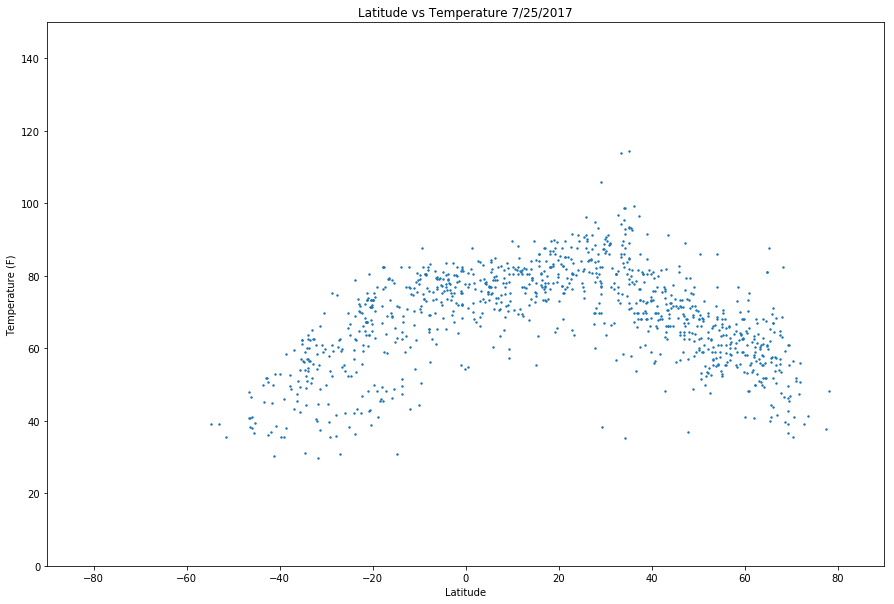

In [78]:
#create plot for latitude vs temperature
x = df3['Latitude']
y = df3['Temperature']
plt.scatter(x,y,s = 2)
plt.ylim(0, 150)
plt.xlim(-90, 90)
plt.title('Latitude vs Temperature 7/25/2017')
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')

Text(0.5,0,'Latitude')

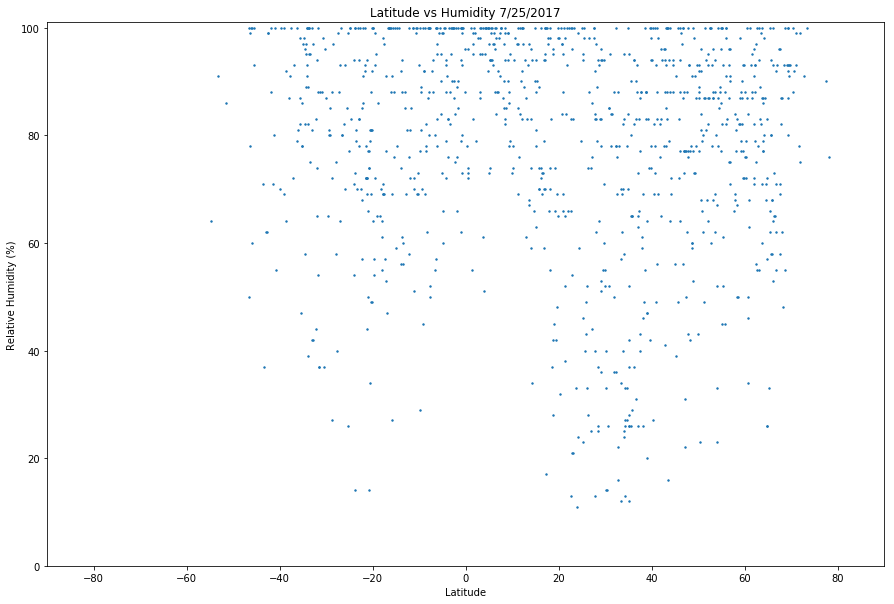

In [79]:
#create plot for latitude vs humidity
x = df3['Latitude']
y = df3['Humidity']
plt.scatter(x,y,s = 2)
plt.ylim(0, 101)
plt.xlim(-90, 90)
plt.title('Latitude vs Humidity 7/25/2017')
plt.ylabel('Relative Humidity (%)')
plt.xlabel('Latitude')

Text(0.5,0,'Latitude')

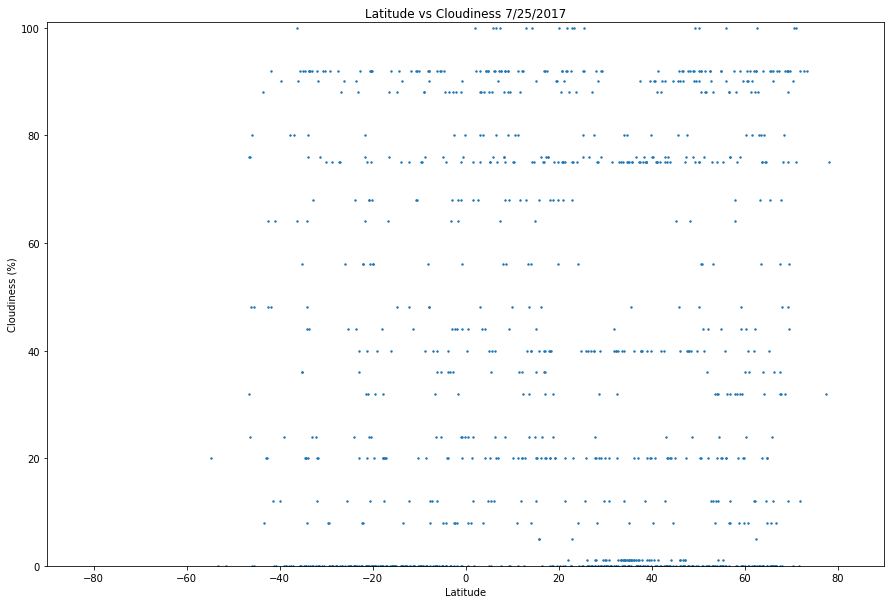

In [80]:
#create plot for latitude vs cloudiness
x = df3['Latitude']
y = df3['Cloudiness']
plt.scatter(x,y,s = 2)
plt.ylim(0, 101)
plt.xlim(-90, 90)
plt.title('Latitude vs Cloudiness 7/25/2017')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

Text(0.5,0,'Latitude')

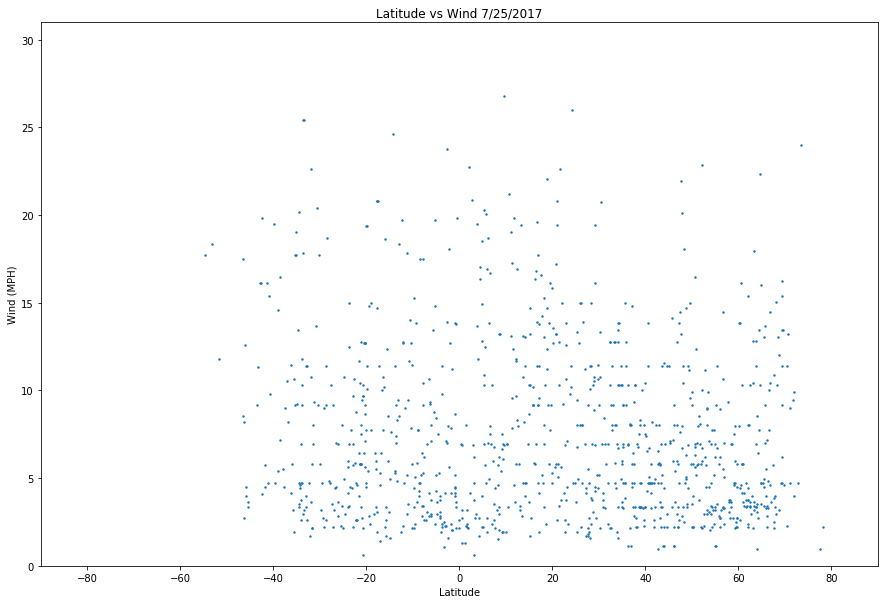

In [81]:
#create plot for latitude vs wind
x = df3['Latitude']
y = df3['Wind']
plt.scatter(x,y,s = 2)
plt.ylim(0, 31)
plt.xlim(-90, 90)
plt.title('Latitude vs Wind 7/25/2017')
plt.ylabel('Wind (MPH)')
plt.xlabel('Latitude')